In [181]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib.animation as animation

In [182]:
translation = np.random.rand(2)*2
a = np.radians(np.random.rand()*20)
rotation = np.array([[np.cos(a), -np.sin(a)],
                    [np.sin(a), np.cos(a)]])

fish = np.loadtxt("fish.csv", delimiter=',')
fish_test = np.dot(fish,rotation.T) + translation
fish1 = fish[fish[:,0] > -.88,:]
fish2 = np.dot(fish[fish[:,0] < .75,:],rotation.T) + translation

print rotation
print translation

[[ 0.96619591 -0.25780898]
 [ 0.25780898  0.96619591]]
[ 0.23345619  0.06932891]


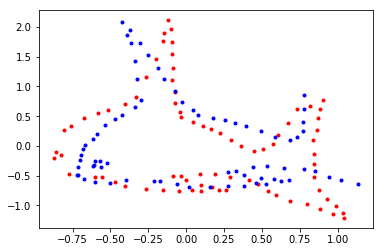

In [183]:
plt.plot(fish1[:,0], fish1[:,1], '.r', fish2[:,0], fish2[:,1], '.b')
plt.show()

In [184]:
def transform(moving, R, t):
    return moving.dot(R.T) + t

In [185]:
def fit(fixed, moving):
    # returns new moving
    # returns R, t
    assert fixed.shape == moving.shape
    fixed_mean = np.mean(fixed, axis=0)
    moving_mean = np.mean(moving, axis=0) 
    fixed_hat = fixed -  fixed_mean
    moving_hat = moving - moving_mean
    
    YTX = np.dot(moving_hat.T, fixed_hat)
    
    U, s, V = np.linalg.svd(YTX, full_matrices= True)
    R = np.dot(U,V)
    t = moving_mean - R.dot(fixed_mean)
    
    return transform(moving-t,R.T,0), R, t

In [186]:
def neighbors(fixed, moving):
    #find neigbors for moving from fixed set
    nn = NearestNeighbors(n_neighbors=1).fit(fixed)
    dist, idx = nn.kneighbors(moving)
    return fixed[idx[:,0],:]

In [187]:
def icp(fixed, moving, iterations=1):
    #normalize
    fixed_mean, fixed_var = np.mean(fixed, axis=0),np.var(fixed,axis=0)
    moving_mean, moving_var = np.mean(moving, axis=0),np.var(moving,axis=0)
    fixed_hat = (fixed - fixed_mean)
    moving_hat = (moving - moving_mean)
    
    #vars
    counter = 0
    moving_history = [moving_hat]
    
    #iterate
    for i in range(iterations):
        #find correspondence
        fixed_hat_subset = neighbors(fixed_hat, moving_hat)
        #transform
        moving_hat,R,t = fit(fixed_hat_subset, moving_hat)
        moving_history.append(moving_hat)
    return moving_hat + fixed_mean, moving_history

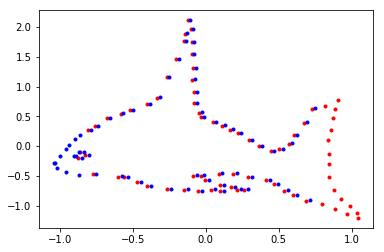

In [188]:
it = 100
fish3,fish_history = icp(fish1,fish2, 100)
plt.plot(fish1[:,0], fish1[:,1], '.r', fish3[:,0], fish3[:,1], '.b')
plt.show()